<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch04_subgradient_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

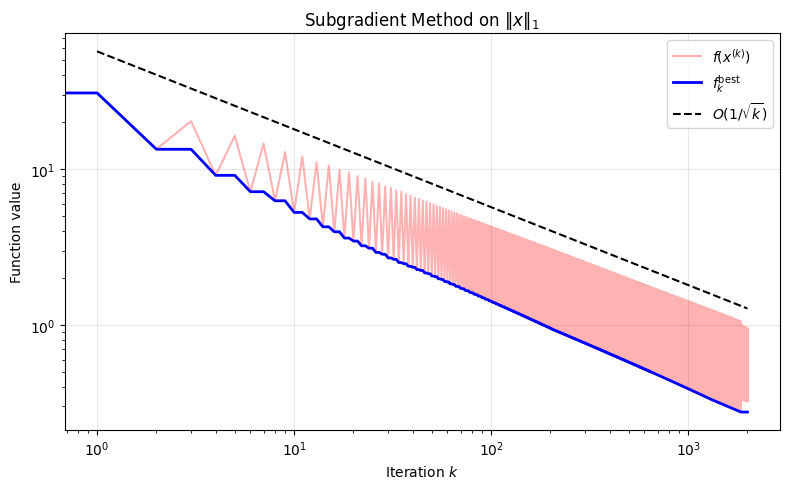

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def subgradient_l1(x):
    """Subgradient of ||x||_1."""
    g = np.sign(x)
    g[x == 0] = np.random.uniform(-1, 1, np.sum(x == 0)) # Any value in [-1,1]
    return g

def subgradient_method(f, subgrad_f, x0, R, G, max_iter=1000):
    """Subgradient method with step size eta_k = R/(G*sqrt(k))."""
    x = np.array(x0, dtype=float)
    f_best = f(x)
    x_best = x.copy()

    history = {'f': [f(x)], 'f_best': [f_best]}

    for k in range(1, max_iter + 1):
        g = subgrad_f(x)
        eta = R / (G * np.sqrt(k))
        x = x - eta * g

        f_val = f(x)
        history['f'].append(f_val)

        if f_val < f_best:
            f_best = f_val
            x_best = x.copy()
        history['f_best'].append(f_best)

    return x_best, history

# Example: minimize ||x||_1
np.random.seed(42)
n = 20
x0 = np.random.randn(n) * 3
R = np.linalg.norm(x0) # Distance to x* = 0
G = np.sqrt(n) # ||g||_2 <= sqrt(n) for l1 subgradient

x_opt, history = subgradient_method(
    lambda x: np.sum(np.abs(x)),
    subgradient_l1,
    x0, R, G, max_iter=2000
)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.loglog(history['f'], 'r-', alpha=0.3, label='$f(x^{(k)})$')
ax.loglog(history['f_best'], 'b-', linewidth=2, label='$f^{\\mathrm{best}}_k$')

# Theoretical rate
k = np.arange(1, len(history['f_best']) + 1)
ax.loglog(k, R * G / np.sqrt(k), 'k--', label='$O(1/\\sqrt{k})$')

ax.set_xlabel('Iteration $k$')
ax.set_ylabel('Function value')
ax.set_title('Subgradient Method on $\\|x\\|_1$')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('subgradient.pdf', bbox_inches='tight')
plt.show()